In [1]:
import random
import sklearn
import sklearn.datasets 
import sklearn.svm as svm
import numpy as np
from matplotlib import pyplot as plt

# Tell matplotlib to show the plots within the notebook.
%matplotlib inline

Welcome to the second part of Assignment 1. Please remember that there is another Notebook together with this :) 

In this Notebook we will start by downloading a small digits dataset and visualizing some samples. Afterwards, we will learn how to split our data to train-validation-test splits in order to train a linear classifier. Don't worry, we will use existing library for training the classifier. Our focus is mainly on splitting the data and being able to process the output of a classifier. 

You will learn how to convert raw outputs to predictions and probability distributions. We will also do a very small hyper-parameter tuning over our validation set. 

In [2]:
digits = sklearn.datasets.load_digits()

Visualize some images! 

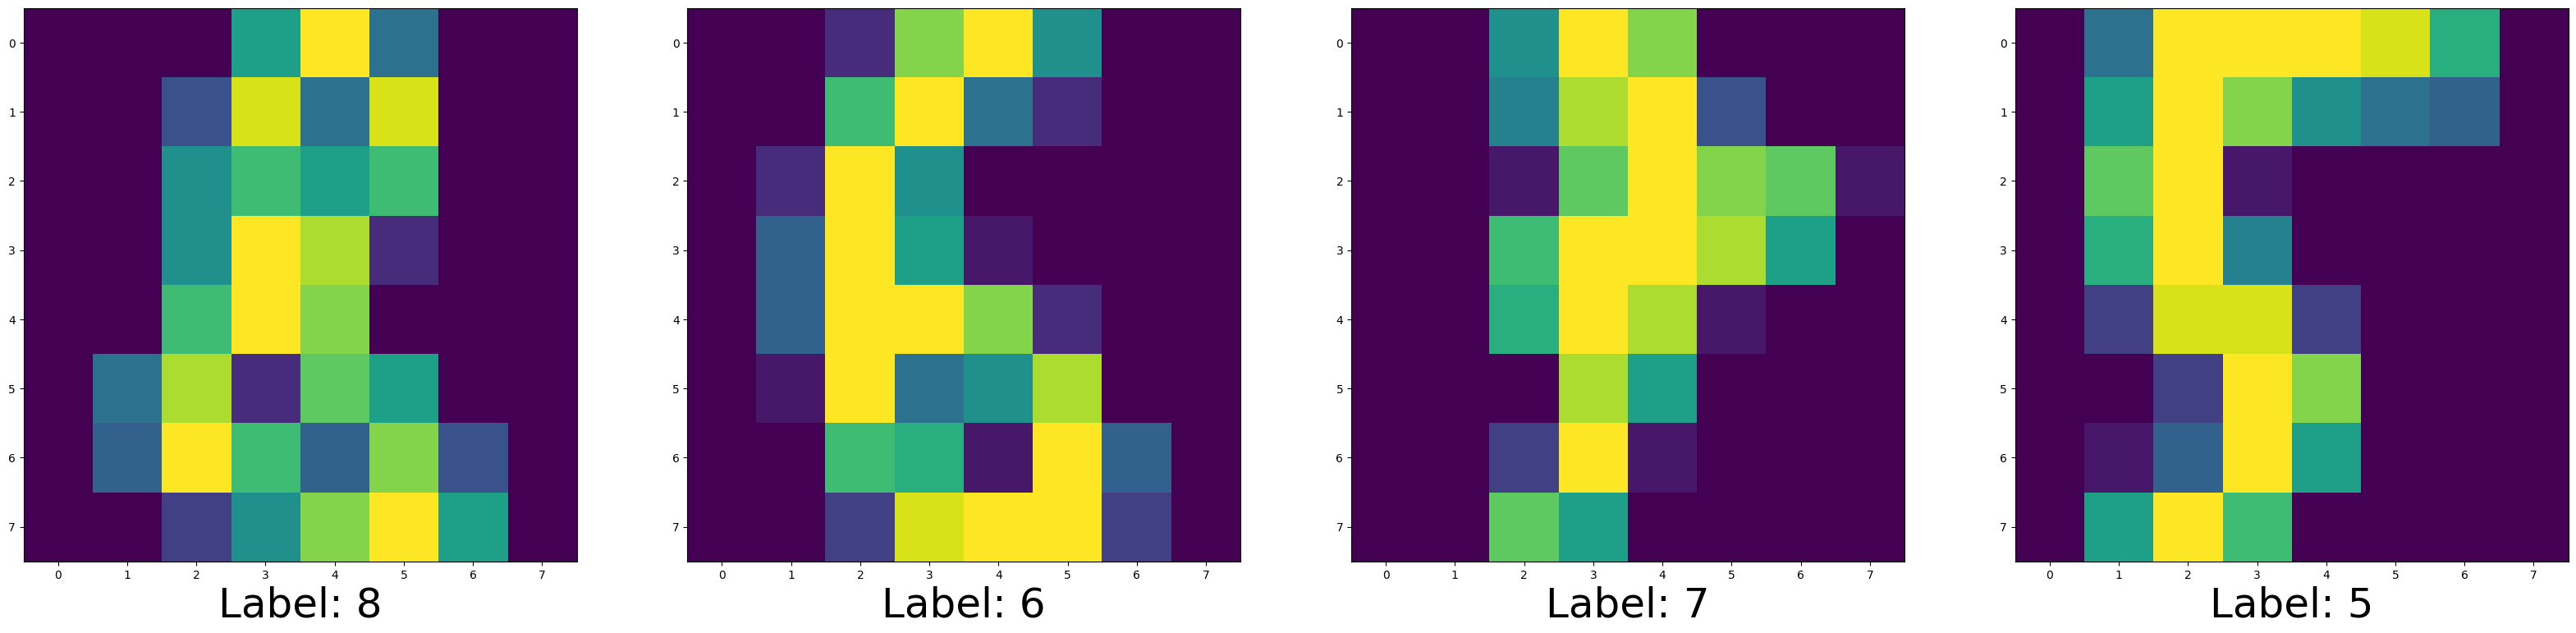

In [3]:
n = 4
random_indices = [random.randint(0, len(digits.images)) for i in range(n)]

fig, axes = plt.subplots(1, n, figsize=(40*1, 40*n))

for _col, sample_idx in enumerate(random_indices):
    img, lbl = digits.images[sample_idx], digits.target[sample_idx]
    axes[_col].imshow(img)
    axes[_col].set_xlabel(f"Label: {lbl}", fontsize=36) 

plt.show()

In [16]:
def train_test_split(data, target, fraction):
    ########  TODO ########################
    # 1. Shuffle the data and targets
    # 2. Split it based on the fraction
    # 3. Return (train_1, target_1, train_2, target_2of two splits
	# You `cannot` use train_test_split function provided by some library.
	# You are however welcome to look into their source code to see how one does this if it helps.
    shuffled_idx = np.random.permutation(len(data))
    data, target = data[shuffled_idx], target[shuffled_idx]

    frac = int(np.ceil(len(data) * fraction))

    data_train = data[:frac]
    data_test = data[frac:]

    target_train = target[:frac]
    target_test = target[frac:]

    #######################################
    return data_train, target_train, data_test, target_test

In [17]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [18]:
# Split data into 50% train and 50% test subsets
X_trainval, y_trainval, X_test, y_test = \
    train_test_split( 
        # TODO First separate the test samples!
        # Side-note: In a real benchmark people often use the same official test-set so that they can
        # compare their numbers to each other. In this assignment however we simply create our own
        # randomly selecmodel_imagestd test set from the data.
        data, digits.target, 0.5
    )

# Now Split the TRAIN data into 80% train and 20% validation subsets
X_train, y_train, X_val, y_val = \
    train_test_split( 
        # TODO Now separate the cross-validation samples!
        X_trainval, y_trainval, 0.8
    )

In [19]:
print(f"{X_train.shape=} {y_train.shape=}")
print(f"{X_val.shape=} {y_val.shape=}")
print(f"{X_test.shape=} {y_test.shape=}")

X_train.shape=(720, 64) y_train.shape=(720,)
X_val.shape=(179, 64) y_val.shape=(179,)
X_test.shape=(898, 64) y_test.shape=(898,)


In [45]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.00001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the val subset
output = clf.decision_function(X_val)

print(f"Model output has shape {output.shape}")


########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = output.argmax(axis=1)
########################################

Model output has shape (179, 10)


In [46]:
def accuracy_top1(predictions, targets):
    ########  TODO ########################
    # Return the mean accuracy (range from [0, 100])
    top1_acc = 0
    top1_acc = np.sum(predictions == targets)/len(predictions) * 100
    return top1_acc # replace with accuracy
    ########################################

In [47]:
print(f"Cross-validation accuracy is {accuracy_top1(preds, y_val):0.3f}")

Cross-validation accuracy is 73.743


Go back to the previous cell and try different gamma values [0.1 0.01 0.001 0.0001 0.00001] for the classifier configuration and report results for each over the `val` set. Simply replace the written 0.1 value.


Please write down your tested values and results here. Which gamma value worked best on the val set?


0.1 -> 16.760

0.01 -> 57.542

0.001 -> 100.000

0.0001 -> 98.324

0.00001 -> 73.743

The best gamma value that gave us 100% accuracy on the validation data was 0.001.

In [53]:
# Now insert your best gamma value and train the model again.
best_gamma_value = 0.001 # Replace this with your best finding!

clf = svm.SVC(gamma=best_gamma_value)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
output = clf.decision_function(X_test)

########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = output.argmax(axis=1)
########################################

In [54]:
print(f"Final test accuracy is {accuracy_top1(preds, y_test):0.3f}")

Final test accuracy is 98.998


In [96]:
def softmax(x):
    """
    Args       x: Numpy array of shape (N, num_classes) with real values
    Returns    Numpy array of shape (N, num_classes) with softmax probability scores
    """
    ########  TODO ########################
    # return per-sample softmax scores
    sum_of_exp = np.expand_dims(np.sum(np.exp(output), axis=1), axis=1)
    return np.exp(x) / sum_of_exp
    ########################################

########  TODO ########################
# Using the softmax function defined above, convert (N, 10) outputs 
#to (N,) Softmax probabilities for the predicted class
scores = softmax(output).max(axis=1)
########################################

In [97]:
scores.shape

(898,)

Visualize some of the test predictions!

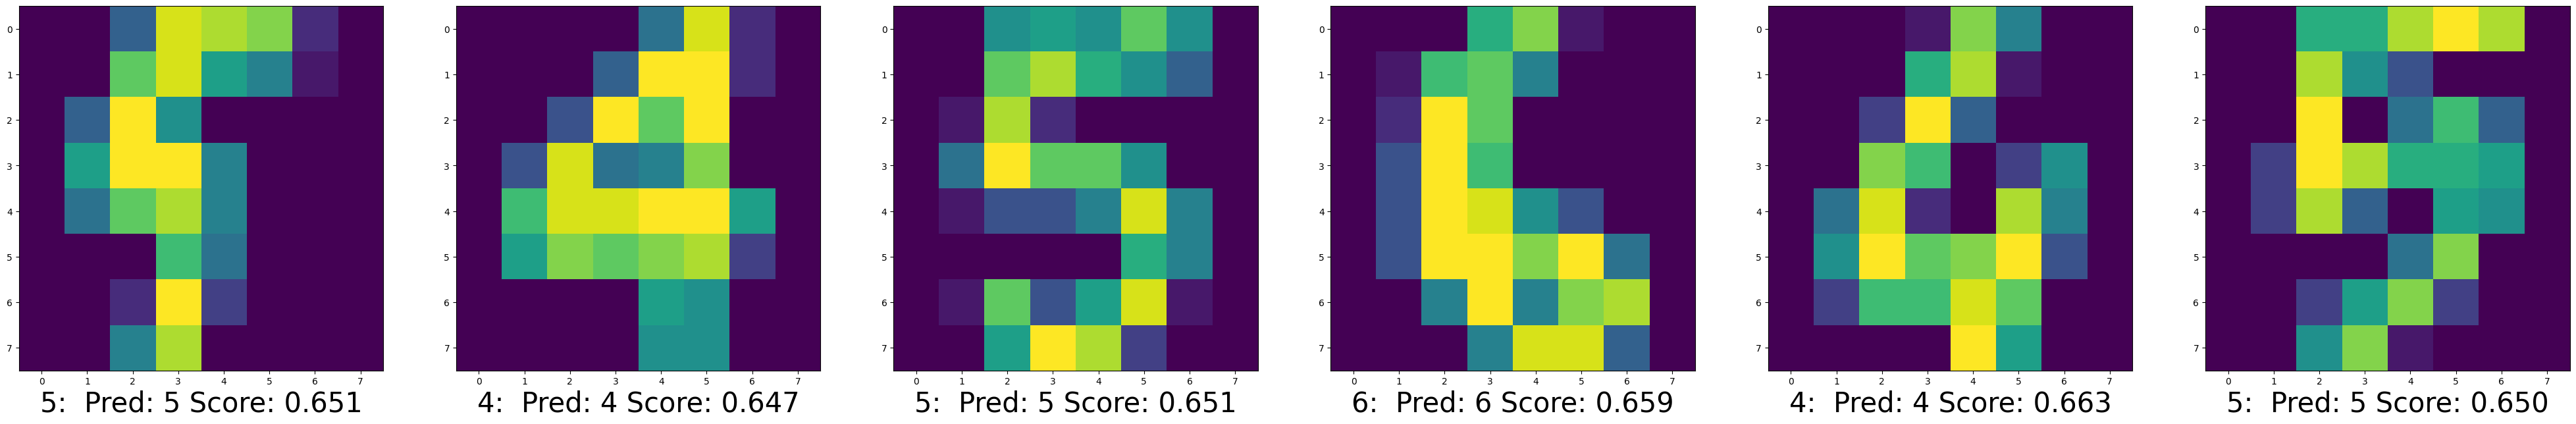

In [98]:
n = 6
random_indices = [random.randint(0, len(X_test)) for i in range(n)]
fig, axes = plt.subplots(1, n, figsize=(50*1, 50*n))


for _col, sample_idx in enumerate(random_indices):
    img = X_test[sample_idx].reshape((8, 8))
    lbl = y_test[sample_idx]

    axes[_col].imshow(img)
    axes[_col].set_xlabel(
        f"{lbl}:  Pred: {preds[sample_idx]} Score: {scores[sample_idx]:0.3f}",
        fontsize=30
    )

plt.show()